 # <p style='text-align: justify;'>  Python i GEO2300 </p>

----------
<img src="soyle.jpg">


# Contents

1. [Hvorfor Python?](#hvorfor)

2. [Pressure.py - Et Eksempel](#firstexamp)

3. [Oppvarmingsoppgaver Python](#varm)

   3.1 [f2c](#f2c)
   
   3.2 [Oppvarmingsoppgaver lineær algebra](#linalg)

   3.3 [Density](#dens)
   
   3.4 [PressureFunc](#presfunc)
   
   3.5 [Paleomagnetisme](#pal)

   3.6 [Refraksjonstider](#refrak)
   
   3.7 [Potensiell Temperatur](#pottemp)
   
   3.8 [Vertikalstruktur av atmosfæren](#vertstrukt)
   
   3.9 [Heaviside step function](#heavi)
   
   3.10 [Utlede en algoritme](#pdeutled)
   
4. [Differensiallikninger i Python](#difeq)

   4.1 [Ordinære Differensiallikninger](#ODE)
   
   4.2 [Repetisjon ODE](#simpelODE)
   
   4.3 [Sammenlikning av ulike numeriske metoder for ordinære differensiallikninger](#compareODE)
   
   4.4 [RungeKutta4](#RK4)
   
   4.5 [Partielle Differensiallikninger](#FTCS)
   
   4.6 [Enkel bruk av FTCS](#FTCSeks)


### Hvorfor Python?
<br>
<a id = 'hvorfor'></a>
<br>
I løpet av det første året på Geofysikk og Klima har man allerde rukket å bli kjent med programmeringsspråket Python. Både gjennom kurs der Python har vært i fokus, og kurs der Python har blitt brukt som et verktøy i å modellere og visualisere. Dette kompendiet lener seg mot sistnevnte, da det er beregnet mot studenter som har vært borti Python tidligere og forventer kjennskap til grunnleggende kunnskap til Python sin syntax. Kompendiets formål er å repetere, samt motivere med grunnleggende programmeringsoppgaver gitt en geofaglig vri. I tillegg inneholder kompendiet en metode og eksempel på hvordan løse problemer med diffusjonslikningen. Python kan fremstå som stort og uoversiktlig i starten, men vi håper at dette kompendiet motiverer til videre bruk av Python. Det er tross alt få språk som er like anvendelige og relevante å kunne bruke som Python.  

<br>
<a id='firstexamp'></a>
<br>

 # Pressure.py - Et eksempel 
 --------
 

I dette eksemplet skal vi se på hvordan man kan lese inn data fra en fil, og bruke det til å beregne atmosfærisk trykk og plotte trykket mot atmosfærens høyde. Vi starter koden med å lese inn datasettet "atmosphere_density_data.txt" som ligger i samme mappe som .py filen, anser importering av pakker som trivielt.
```python
data = np.loadtxt("atmosphere_density_data.txt")
```
loadtxt metoden i numpy kan lese filer som inneholder tydelig markerte kolonner som er like lange, og lagrer de i en array med lengde lik antall kolonner i filen. Dersom filen ikke er formatert slik at loadtxt fungerer, har python en innebygd måte å lese inn filer
```python
# eksempel der loadtxt ikke kan brukes
data = open("atmosphere_density_data.txt","r")
```
derimot vil denne varianten innebære at filen blir lest linje for linje, og en er selv ansvarlig for å lese filen riktig, og plassere riktig data i riktig array. loadtxt fra numpy er dermed å foretrekke.

Videre definerer vi to arrayer "height" og "density", når vi hente verdier fra "data" arrayen anvender "slicing", som er Pythonsk for å unngå unødvendig bruk av for-løkker. I tillegg er dette et datasett som går fra toppen av atmosfæren mot bunnen, siden vi ønsker å integrere opp trykket fra bunnen mot toppen av atmosfæren, legger vi på en "[::-1]" på slutten for å "snu" arrayen.
```python
height = data[:,0][::-1]
density = data[:,1][::-1]
```
Siden "data"-arrayen er tilsvarende en (2x2)-matrise, kan vi lese syntaxen vi bruker for å fylle "height" som "[:,0]: alle x, gitt y = 0", tilsvarende for density. 

videre definerer vi konstanten "g" og konstruerer den tomme arrayen "pressure"
```python
g = 9.81
pressure = zeros_like(density)
```
Siden Python ikke har noen metode for å konstruere ekte tomme arrayer, konstruerer vi en 0-array for "pressure", som er like lang som "density". Så skriver vi en for-løkke for å fylle "pressure" med verdier
```python
for i in range(len(pressure) - 1):
    pressure[i+1] = pressure[i] - density[i]*g*(height[i+1] - height[i])
 ```
 der likningen vi bruker er den for hydrostatisk trykk, vi antar altså at atmosfæren er i ro. Til slutt bruker vi matplotlib for å plotte dataene.
```python
plt.figure(1)
plt.title("Atmosphere pressure")
plt.plot(pressure,height,color='black')
plt.ylabel('height [m]')
plt.xlabel('pressure [Pa]')
plt.show()
```
Under ligger programmet i sin helhet

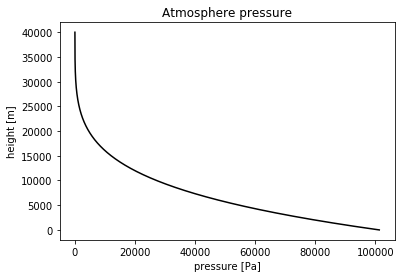

In [7]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("atmosphere_density_data.txt")

# Filling arrays
height = data[:,0][::-1]
density = data[:,1][::-1]

# Defining constants
g = 9.81
pressure = np.zeros_like(density)

# for-loop to fill pressure-array
for i in range(len(pressure) - 1):
    pressure[i+1] = pressure[i] - density[i]*g*(height[i+1] - height[i])

# Plotting
plt.figure(1)
plt.title("Atmosphere pressure")
plt.plot(pressure,height,color='black')
plt.ylabel("height [m]")
plt.xlabel("pressure [Pa]")
plt.show()

<br>
<a id='varm'></a>
<br>

### Oppvarmingsoppgaver i Python

-------

<br>
<a id='f2c'></a>
<br>

## Oppgave 1 - f2c.py


#### 1.1


Skriv en funksjon f2c som tar inn et flyttall F som parameter og returnerer et flyttall C, ved å bruke likningen for Fahrenheit til Celsius $C = \frac{5}{9}(F - 31)$

#### 1.2
Skriv en testfunksjon, test_f2c som sjekker at funksjonen f2c er implementert riktig. 

#### 1.3
Last ned filen dallas_temp.dat. Les alle kolonnene og legg dem i forskjellige arrayer med relevant navn. Pass på at alle arrayene har samme lengde. 

Husk: En array i Python er ikke det samme som en liste. I Python må man starte med å importere numpy for å konstruere arrayer. Noen eksempler følger:
```python
import numpy as np
# Noen ulike array-konstruksjoner
u = np.array(['din liste'])                # konverterer en ferdig liste til et objekt av typen numpy.ndarray
u = np.zeros('heltall')                    # returnerer en 0-array med lengde lik heltallet gitt som parameter
u = np.zeros_like('array')                 # returnerer en 0-array lik arrayen gitt om parameter 
u = np.linspace('start','stopp','antall')  # returnerer en array med 'antall' jevnt fordelte elementer fra start til stopp
```
#### 1.4
Lag en figur der du plotter temperaturen fra dallas_temp.dat i Celsius. Formater figuren med tittel og navn på aksene. Dokumentasjonen til matplotlib inneholder både alt av innhold, og eksempler til bruk og formatering av plot. 
[Dokumentasjonen finner du her](https://matplotlib.org/3.1.1/contents.html).

#### 1.5
I datasettet er det flere temperaturer som er målt til -99 Fahrenheit, detter er målefeil. Skriv en løkke som tester om temperaturen er målt feil. Om testen detekterer en målefeil, skal verdien erstattes med et gjennomsnitt beregnet av temperaturen dagen før og dagen etter. Oppdater figuren din med den nye temperaturarrayen. 

<br>
<a id='linalg'></a>
<br>

## Oppgave 2 - Lineær algebra og Python
----

Gitt likningsettet
$$
\begin{matrix}
    3x + 2y + 5z = 0\\
    7x + 6y + 4z = -2\\
    z + 3y + 2z = -6\\
\end{matrix}
$$

#### 2.1
Skriv likningsettet på formen $A\underline{x} = \underline{b}$, der A er en 3x3-matrise og $\underline{b}$ er en 3x1-vektor. Hvordan ville du løst liknignsettet for $\underline{x}$?

#### 2.2
Bruk Python til å løse likningssettet for $\underline{x}$. De relevante matriseoperasjonene ligger i pakken numpy.linalg, og kan nås ved å skrive
```python
from numpy import linalg
.
.
.
# bruk av linalg
linalg.metodeNavn()
```
Numpy sine matriseoperasjoner ligger i [dokumentasjonen](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html).


#### 2.3
Fulllfør kodeskjellet under. Skriv en funksjon, selfMadeIdMatrix(n), som tar inn en parameter n som bestemmer størrelsen, og retunrner en identitetsmatrise I. Fra numpy kan du bruke funksjonen zeros((n,m)) å opprette en nXm-matrise der alle elementer = 0. Print matrisen for å kontrollere at du har fått riktig resultat. 

```python
import numpy as np

def selfMadeIdMatrix(n):
    for i in range():
        for j in range():
            
    
    return #identitetsmatrise


```

<br>
<a id='dens'></a>
<br>

### Oppgave 3 - Density.py

-----------

I denne oppgaven skal du lage et program som kan beregne masse,volum og gjennomsnittelig tetthet til forskjellige planeter. 


Masse : $M = \frac{gR^2}{G}$

Volum: $V = \frac{4}{3}\pi R^3$

Tetthet: $\rho = \frac{M}{V}$

R = Radius (m)

G = gravitasjonskonstanten ($\frac{m^3}{Mg s^2}$)



Lag en funksjon som tar inn de nødvendige parameterene. Finn masse, volum og tetthet for jorda(R=6371 km) og Mars(R = 3389.5 km, g = 3.711 $\frac{m}{s^2}$.

```python

import numpy as np
import matplotlib.pyplot as plt

G = 6.672e10-8

def densFunc():


```

<br>
<a id='presfunc'></a>
<br>

### Oppgave 4 - presFunc.py
---

Likningen for hydrostatisk trykk er gitt ved $P = P_0 + \rho gh$, der $\rho$ er tettheten til væsken, g er tyngdens akselerasjon, h er dybden under overflaten. 
#### a)
Skriv en funksjon "pressure" som tar inn trykket ved overflaten, væskens tetthet, gravtiasjonskonstanten og dybden. Funksjonen skal returnere trykket ved den angitte dybden.

#### b)
Bruk funksjonen til å finne trykke i følgende væsker:
Vann ved 10m dybde  
Råolje ved 15m dybde  
Bunnen av et glass med melk   
Trykket ved bunnen av Marianegropen  

#### c)
Utvid funksjonen din slik at h både kan være et tall, og en array med flere h-verdier. Hvis funksjonen oppdager at h er en array, skal den ta hensyn til det ved å plotte trykket over alle veridene til h. 

<br>
<a id='pal'></a>
<br>

### Oppgave 5 -  Paleomagnetisme
---

_"Paleomagnetisme er studiet av spor etter jordens magnetfelt i bergarter. Noen mineraler i stein bevarer et minne (remanens) om styrken og retningen av jordens magnetfelt når de dannes. Dette kan gi kunnskap om endringer i jordmagnetfeltet, og være grunnlag for å angi hvordan tektoniske plater har beveget seg. Spor etter polvendinger i lag av vulkanske og sedimentære bergarter gir en tidsskala som brukes i geologien."_

For å gjøre paleomagnetiske undersøkelser kan man bruke likningen:

$tan  I = 2 tan \lambda$

I : Magnetisk inklinasjon

$\lambda$ : Magnetisk breddegrad

a) Du skal nå lage en funksjon som tar inn magnetisk inklinasjon som parameter og returnerer den tilhørende magnetiske breddegrad.

b) Bruk programmet du har skrevet til å løse eksamensoppgaven fra GEL2140,2012:

_I Rogaland finnes det to ulike systemer med gangbergarter, ”Hunnedalengangene” og ”Egersundgangene” som ved radioaktiv datering er funnet å være henholdsvis 850 og 616 millioner år gamle. Paleomagnetiske undersøkelser av de to bergartene gir inklinasjonsvinkler på henholdsvis -75° for Hunnedalengangene og +68° for Egersundgangene. På hvilken breddegrad befant Rogaland seg ved disse to ulike tidspunktene(dersom vi antar at jordens magnetfelt hadde samme polaritet (normal polaritet) som i dag)?_

```python

import numpy as np

def magInc2Lambda(I):


```

<br>
<a id='refrak'></a>
<br>

### Oppgave 6 - Refraksjonstider
-----------

I refraksjonsseismikk bruker man seismiske bølger til å kunne fastå en rekke geologiske forhold og strukturer. 

Likningen: 

$t = \frac{x}{v_2} + 2h_1 \sqrt{\frac{1}{v_1^2} - \frac{1}{v_2^2}}$ beskriver tiden t, til den refrakterte bølgen(se figur).

x =  avstand fra skuddet (kilden)

h1 =  tykkelsen på det øverste laget.

v1 =  hastigheten i det øverste laget.

v2 = hastigheten i det andre (neste) laget.

<img src="refraction.png">


Det skal utføres en miljøgeologiskundersøkelse ved hjelp av refraksjonsseismikk og du har blitt bedt om å lage et program som beregner forventet ankomsttid for den refrakterte bølgen. Ettersom hastigheten i laget er avhengig av den geologiske strukutren og denne er ukjent, har du blitt bedt om å lage forventede ankomsttider for 10 equally spaced laghastigheter, fra 1500 m/s til 3500m/s. Målestasjonen befinner seg 100 meter fra skuddet. Du får også oppgitt at det øverste laget av ukjent geologisk struktur er 25 meter tykt og ligger over et lag krystallint grunnfjell med en laghastighet på 6200 m/s. Fullfør kodeskjelletet under og plott resultatet.

```python
import numpy as np
import matplotlib.pyplot as plt

def RefractionTimes(v1_start, v1_stop, v_step, v_2, h_1,x):

```

<br>
<a id='pottemp'></a>
<br>

### Oppgave 7 -  Potensiell Temperatur
-----------


I meteorologi er potensiell temperatur ($\theta$) definert som temperaturen en "luftpakke" ville hatt, dersom den hadde blitt ekspandert eller komprimert adiabatisk fra eksiterende trykk,p, til et standard trykk $p_0$(vanligvis satt til 1000 hPa). Ettersom atmosfæriske prosesser ofte er tilnærmet adiabatiske er denne parameteren ekstremt nyttig fordi $\theta$ da holder seg konstant, i motsetning til andre parametere som avhenger av ustabile betingelser. 


 $ \theta = T( \frac{p_0}{p})^\frac{R}{c_p} $ 
 
 T = Nåværende temperatur(K) i luftpakke
 
 R = Gasskonstanten for luft
 
 $c_p$ = Spesifikk varmekapasitet ved konstant trykk. 
 
$\frac{R}{c_p}$ kan settes = 0.286
 
 
 

Lag en funksjon som tar inn enn temperatur T og et trykk p og returnerer den potensielle temperaturen


```python

import numpy as np
import matplotlib.pyplot as plt

def temp2theta(T,p):
    return 

```
En luftpakke har en temperatur på 20 $^{\circ}$C ved 900 hPa. Ved hvilket trykk har den potensielle temperaturen økt med 20 grader iforhold til utgangspunktet? Utvid programmet ditt med en løkke som løper gjennom atmosfæren fra bunn til topp og returnerer trykket der dette skjer. 

```python
import numpy as np
R_cp = 0.286
p_0 = 1000


def thetaFunc(T, T_dif):
    p = np.linspace(900, 10, 891)
    


```

<br>
<a id='vertstrukt'></a>
<br>

### Oppgave 8 -  Vertikal struktur av atmosfæren

-----------

I den forrige oppgaven brukte vi trykk(hPa) til å omtale høyden i atmosfæren. For å få en bedre forståelse av dette skal du nå plotte trykk som en funksjon av høyde. Vi gjør noen forenklinger og antar konstant temperatur og gravitasjon gjennom atmosfæren. Høyden kan da beregnes ved hjelp av den hypsometriske likningen:

$Z_2 - Z_1 = Hln(\frac{p_1}{p_2})$

Denne likningen gir forholdet mellom lyfttrykk og tykkelse av atmosfærelag, der

$Z_2 - Z_1$ = Tykkelsen på laget i meter

H = Skalahøyde (den vertikale avstanden der lufttrykket avtar med en faktor e. Skalahøyden er konstant for en gitt temperatur)

p = trykk. 

Du skal nå bruke likningen og lage et program som finner er uttrykk for $Z_2$. Fullfør kodeskjelletet under og plott resultatet. 

```python

import numpy as np
import matplotlib.pyplot as plt


p_array = np.linspace(1000,10,991) #Pressure from bottom to top, with 991 steps. 
z_array = np.zeros_like(p_array) #m
scale_H = 8000 #m

for i in range(len(p_array)-1):
            z_array[i+1] = 

```

<br>
<a id='heavi'></a>
<br>

### Oppgave 9 - Heaviside step function
---
I oppgaver med varmediffusjon ser man gjerne på tilfeller der temperaturen brått endrer seg fra en verdi til en annen verdi. Dette hoppet i temperatur brukes til å beskrive initialbetingelsen til systemet

$$
f(x) = 
\begin{cases} 
      K_1 & x \leq x_1\\
      K_2 & x > x_1 
\end{cases}
$$

Ser man på diffusjonslikningen skalert, vil også initialbetingelsen skaleres tilsvarende. Resultatet er Heaviside funksjonen, som er på formen

$$
H(X) = 
\begin{cases}
    0 & x \leq 0\\
    1 & x > 0
\end{cases}
$$

#### a)
Skriv en funksjon i Python H(x), som tar inn et flyttall og returnerer enten 0 eller 1 bestemt av Heaviside funksjonen

#### b)
Modifiser funksjonen din slik at den bare inneholder et return statement

#### c)
Uten å bruke semikolon, skriv funksjonen på en linje

#### d)
Skriv funksjonen i c) som en lambda funksjon

<br>
<a id='pdeutled'></a>
<br>

### Oppgave 10 - Utlede en algoritme
---

I denne oppgaven skal vi bruke Taylorrekker for å utlede en algoritme som kan brukes til å løse partielle differensiallikninger numerisk

Vis med Taylorrekker at $f'(t) \approx \frac{f(t + dt) - f(t)}{dt}$

Bruk resultatet til å vise at $f'(t) \approx \frac{f(t + dt) - f(t - dt)}{2dt}$, hva heter denne likningen?

1) Vis at $g''(x) \approx \frac{g(x+h) -2g(x) + g(x+h)}{h^2}$

Videre ser vi på likningen 
$$
\frac{\partial u}{\partial t} = \frac{{\partial^2} u}{\partial x^2}
$$
med randbetingelser $u(0,t) = u(1,t) = 0$ og initialbetingelse $u(x,0) = f(x)$

2) Ta utgangspunkt i tidligere løsninger, og utled tilnærminger for $\frac{\partial u(x,t+\Delta t)}{\partial t}$ og $\frac{{\partial^2} u(x,t+\Delta t)}{\partial x^2}$

3) Anta så at $v_j^m$ er en diskret tilnærming av $u(x,t)$, forklar hvorfor
$$
\frac{v_j^{m+1} - v_j^m}{\Delta t} = \frac{v_{j-1}^{m+1} - 2v_j^{m+1} + v_{j+1}^{m+1}}{\Delta x^2}\forall j \in{\{1,..,n\}}, m \geq 0
$$
der indeksen m er steg i t-retning og j er steg i x-retning

4) Finn $v_0^m$, $v_{n+1}^{m}$ og $v_j^0$

5) Vis at høyresiden i likningen fra oppgave 3) kan skrives på formen $\frac{1}{\Delta x^2}A$ der A er en symmetrisk nxn-matrise, skriv A.

6) Vis at likningen fra oppgave 3) kan skrives på formen $(I + \frac{\Delta t}{\Delta x^2}A)v^{m+1} = v^m$, $m\geq0$, hvilket scheme har du nettopp utledet?

<br>
<a id='difeq'></a>
<br>

# Differensiallikninger i python
----

<br>
<a id='ODE'></a>
<br>

## Ordinære Differensiallikninger:
-----

<br>
<a id='simpelODE'></a>
<br>

### Oppgave 1 - Repetisjon ODE
---

I denne oppgaven skal vi se på en enkel form for implementeringen av ordinære differensiallikninger. Minner om at ordinære differensiallikninger kan være likninger på formen
$$
u'(t) = f(u(t)) \\
u(0) = u_0
$$
Vi ser på tilfellet
$$
u'(t) = u(t) \\
u(0) = 1
$$
med analytisk løsning $u(t) = e^{t}$. Tidligere har vi sett på hvordan man kan uttrykke forward-euler ved å se på Taylor-utviklingen til $u(t + \Delta t)$, og hvordan den kan diskretiseres til likningen 
$$
v_{m+1} = v_m + \Delta tf(v_m) \quad m = 0,1,\dots
$$
#### a)
Forklar $f(v_m) = v_m$. Hva er initialbetingelsen $v_0$?

#### b)
Vis at $v_m = (1 + \Delta t)^m$

#### c)
Skriv et program i Python som plotter den analytiske løsningen $u(t)$, samt den estimerte løsningen $v_m$. Plot $v_m$ for ulike tidssteg $\frac{1}{10} \quad \frac{1}{100} \quad \frac{1}{1000}$. 

<br>
<a id='compareODE'></a>
<br>

### Oppgave 2 - Sammenlikning av ulike numeriske metoder for ordinære differensiallikninger
---
Vi skal nå se på ulike numeriske metoder for å løse ordinære differensiallikninger. Likningen vi skal studere er likningen for radioaktivt forfall, gitt ved
$$
\frac{dN}{dt} = -\lambda N
$$
hvor $N$ er mengden av det radioaktive stoffet, og $\lambda$ er decay-konstanten. 
#### a)
Løs likningen for radioaktivt forfall analytisk. 

#### b)
Skriv et program i Python som sammenlikner den analytiske løsningen med den numeriske løsningen gitt av ForwardEuler-metoden. Sett $\Delta t = 1$, $\lambda = 0.25$ og $y_0 = 16$. Plot løsningene dine, og skriv en tabell tilsvarende table 3.1 i boka til Slingerland og Kump. Sammenlikn med tabell 3.1 og se til at resultatene stemmer. Beregn også differansen mellom den estimerte løsning og den analytiske løsningen med 7 desimaler.

#### c)
På side 60 i boka står det om implementering av predictor-corrector steps for  Forward Euler, også kjent som Runge-Kutta metoder. Ta utgangspunkt i likning 3.38 på side 60, og implementer andreordens rungekutta i programmet. Plot og sammenlikn implementasjonen.

<br>
<a id='RK4'></a>
<br>

### Oppgave 3 - RungeKutta4
---
Vi har en tilnærmet perfekt kule med jern på 626.85 grader Celsius, i et rom på 22 grader Celsius. Vi antar at rommet ikke har noen varmekilder. Likningen for varmetap er gitt ved
$$
\frac{d\theta}{dt} = -2.2067\times 10^{-12}({\theta}^4 - 81\times 10^8)
$$
der $\theta$ er gitt i Kelvin og $t$ er i sekunder.

Vi skal nå se på fjerdeordens RungeKutta. Metoden er skrevet på formen
$$
k_1 = f(t_i, x_i) \\
k_2 = f(t_i + \frac{h}{2}, x_i + \frac{hk_0}{2}) \\
k_3 = f(t_i + \frac{h}{2}, x_i + \frac{hk_1}{2}) \\
k_4 = f(t_k + h, x_i + hk_2 \\
x_{i+1} = x_i + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)
$$
hvor i er tidssteget og h er steglengden.  
#### a)
Implementer fjerdeordens RungeKutta i programmet, og plot over domenet [0,2000]. Hvor mange minutter det tar å halvere temperaturen til kula? I tillegg plot temperaturen mot tiden.

<br>
<a id='FTCS'></a>
<br>

## Partielle differensiallikninger i python:
------

Python er et velegnet språk for å løse partielle differensiallikninger. Avhengig av programmeringsbakgrunn kan det virke utfordrende i starten, men når man først har lært det kan det brukes på en rekke forskjellige problemer kun med små justeringer av parametere. Derfor skal dette appendikset fokusere på å skrive en generell metode, som kan brukes på de fleste problemer der diffusjonslikningen står sentralt. For alle numeriske løsninger står oppsett programmering av "griddet" i første rekke. (Programmet som blir brukt i dette eksempelet er sterkt basert på [kode skrevet av Hans Petter Langetangen](https://github.com/hplgit/num-methods-for-PDEs/blob/master/src/diffu/diffu1D_u0.py))

<img src="scheme.png">

Griddet kan sees på som en matrise, der hver rad er en løsning i hvert diskrete punkt i (x,t). Antall rader og avstanden mellom dem bestemmes av T (lengden av simuleringen) og $\Delta t$ (tidssteget), på samme måte som antall kolonner bestemmes av lengden(L) på domenet vi undersøker([0,L]) og antall punkter dette deles opp i $\Delta x$. Det er viktig å merke seg at vi kun har løsninger i disse punktene! Funksjonen FTCS() vist under illusterer hvordan man  kan sette opp et grid. Valg av verdier for paramterne L,dt, F og T bestemmer størrelse og oppdeling av griddet. Nt og Nx er antall punkter i henholdsvis t og x og er direkte funksjoner av lengden på simulering/domenet og steglengde.  
```python
def FTCS(I, U0, U1, a, L, dt, F, T):

    
    Nt = int(T/dt)
    t = np.linspace(0,Nt*dt,Nt+1)
    dx = np.sqrt(a*dt/F)
    Nx = int(L/dx)
    x = np.linspace(0,L,Nx+1)

    dx = x[1] - x[0]
    dt = t[1] - t[0]

    u = np.zeros(Nx+1)
    u_n = np.zeros(Nx+1)
```

Koden np.zeros(Nx+1)oppretter en array med størrelse Nx+1 bestående av nuller. u og u_n er altså vektorer (etterhvert) bestående av løsninger.

### Initialbetingelsen:
---
I dette apendixet jobber vi med diffusjonslikningen; $\frac{\partial u}{\partial t} =\alpha \frac{\partial^2 u}{\partial x^2} $. 
For å løse en partiell differensiallikning som er førstederivert i tid og andrederivert i rom trenger man én initialbetingelse og to randbetingelser. Initialbetingelsen (IC) er den opprinnelige tilstanden i "systemet" ved $t=0$. Visualisert i griddet tilsvarer dette:

<img src="IC.png">

I dette apendixet tar vi utgangspunkt i oppgave 2.2 i læreboka blablabla. I denne oppgaven skal man simulere hastigheten til en olje i et rom avgrenset av 2 vegger. Ved $t=0$ vil oljen ha en hastighet på $0 [\frac{m}{s}]$, altså vil IC være 0 for alle x. I koden under brukes en for-løkke til å fylle inn IC for alle x i arrayen u_n. 
```python
import numpy as np
import matplotlib.pyplot as plt

def FTCS(I, U0, U1, a, L, dt, F, T):

    # setter opp grid
    
    Nt = int(T/dt)
    t = np.linspace(0,Nt*dt,Nt+1)
    dx = np.sqrt(a*dt/F)
    Nx = int(L/dx)
    x = np.linspace(0,L,Nx+1)

    dx = x[1] - x[0]
    dt = t[1] - t[0]

    u = np.zeros(Nx+1)
    u_n = np.zeros(Nx+1)

    # Fyller inn IC:
    for i in range(0, Nx+1):
        u_n[i] = I(x[i])
```        

### Dobbel for-løkke:
---

Sentralt i den numeriske løsningen er den doble for-løkken. Ideen er å lage en løkke som løper over alle tidspunker, med en indre løkke som løper over alle rom-punkter. 

```python
import numpy as np
import matplotlib.pyplot as plt

def FTCS(I, U0, U1, a, L, dt, F, T):

    # setter opp grid
    
    Nt = int(T/dt)
    t = np.linspace(0,Nt*dt,Nt+1)
    dx = np.sqrt(a*dt/F)
    Nx = int(L/dx)
    x = np.linspace(0,L,Nx+1)

    dx = x[1] - x[0]
    dt = t[1] - t[0]

    u = np.zeros(Nx+1)
    u_n = np.zeros(Nx+1)

    # fyller inn IC
    
    for i in range(0, Nx+1):
        u_n[i] = I(x[i])

    #Dobbel for-loop:
    for i in range(0, Nt):
        for j in range(1, Nx):
            #FTCS-scheme:
            u[j] = u_n[j] + F*(u_n[j-1] - 2*u_n[j] + u_n[j+1])
```            

Som navnet på schemet tilsier(Forward Time, Central Space) bruker man løsningen fra forrige tidssteget(u_n[j]) for å produsere løsning for det aktuelle tidssteget(u[j]). 

Likning 2.18 fra læreboka: $T_{j}^{n+1} = sT_{j-1}^{n} + (1-2s)T_{j}^{n} + sT_{j+1}^{n}$ er her skrevet om til:             u[j] = u_n[j] + F*(u_n[j-1] - 2*u_n[j] + u_n[j+1]).

Notasjonen  $T_{j}^{n+1}$ tilsvarer som beskrevet i boka T i romposisjon $_j$ og tidssteg $^{n+1}$.  $T_{j}^{n+1}$ og $ T_{j}^{n} $ er med andre ord erstattet av henholdsvis u[j] og  u_n[j]. 



### Randbetingelser:
---

Som nevnt tidligere trenger diffusjonslikningen 2 randbetingelser. Disse er illustrert i griddet under:

<img src="BC.png"> 

I dette eksempelet vil veggen ved y = 0 bevege seg med en hastighet på 40 $\frac{m}{s}$, mens veggen ved y = 0.04 er stasjonær. Vi utvider koden om implementerer randbetingelsene(BC) i for-løkken. Randbetingelsene programmeres utenfor løkken som løper gjennom rom-punktene, og settes dermed kun til u[0] og u[Nx] for alle t. Dette tilsvarer som navnet tilsier; randpunktene:

### Til slutt
---

Siste steg i modellen er å la den forrige vektoren(u_n) peke på u, og la u peke på u_n. Siden vi kun er interessert i å returnere den siste iterasjonen av u_n, trenger vi ikke å ta vare på den. Funksjonen vil nå etter endt for-loop returnere den siste løsningen u_n, samt en x-aray(0,L,Nx+1). Det finnes selvfølgelig andre måter å implentere et FTCS-scheme på, noen metoder kan for eksempel ta vare på u ved ulike tidssteg noe denne implementasjonen ikke gjør. Derimot er denne implementasjonen effektiv, og returnere to variable som enkelt kan plottes mot hverandre slik at man slipper å slice gjennom matriser som inneholder flere løsninger. FTCS-metoden følger i sin helhet:

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def FTCS(I, U0, U1, a, L, dt, F, T):

    # setter opp grid
    
    Nt = int(T/dt)
    t = np.linspace(0,Nt*dt,Nt+1)
    dx = np.sqrt(a*dt/F)
    Nx = int(L/dx)
    x = np.linspace(0,L,Nx+1)

    dx = x[1] - x[0]
    dt = t[1] - t[0]

    u = np.zeros(Nx+1)
    u_n = np.zeros(Nx+1)

    # fyller inn IC
    
    for i in range(0, Nx+1):
        u_n[i] = I(x[i])

    #Dobbel for-loop:
    for i in range(0, Nt):
        for j in range(1, Nx):
            #FTCS-scheme:
            u[j] = u_n[j] + F*(u_n[j-1] - 2*u_n[j] + u_n[j+1])

        # Setter BC:
        u[0] = U0
        u[Nx] = U1

        # Går til neste steg
        u_n, u = u, u_n

    return u_n, x

<br>
<a id = 'FTCSeks'></a>
<br>

### Enkel bruk av FTCS-skjemaet
---

Oppgave 2 fra kapittel i boka til Slingerland og Kump tar for seg modelleringen av en olje på et begrenset område, betingelsene for oppgaven står på side 38. Denne oppgaven er perfekt for å demonstrere styrken til FTCS-skjemaet vi har. Velger tidssteg på $\frac{1}{80}$. Starter med å definere konstanter
```python
U0 = 40          # m/s
U1 = 0           # m/s
a = 2*10**(-4)   # m^2/s
L = 0.04         # m
dt = 1/80        # s
F = 0.2          # dimentionless
T = 1            # s
```
Initialbetingelsen MÅ implementeres som en funksjon, men å konstruere en hel funksjon tar tid. Derfor bruker vi python sin "lambda-funksjon" for å definere initialbetingelsen så enkelt som mulig
```python
I = lambda x : 0
```
Dette er tilsvarende med å skrive
```python
def f(x):
    return 0

I = f('hva som helst')
```
Videre må vi passe på at .py filen vi skriver i, er i samme mappe som FTCS.py. Neste steg er å importere funksjonen slik at den er tilgjenglig for bruk. Alternativt kan man kopiere koden i FTCS.py og lime den inn .py filen man skriver i, men dette er både krunglete og unødvendig. Vi skriver dermed denne linjen i python for å importere FTCS
```python
from FTCS import FTCS
```
FTCS er dermed tilgjenglig i .py filen vi skriver i, og kan kalles på ved å skrive FCTS(). Nå gjenstår det kun å kalle på FTCS med verdiene vi har definert, husk at FTCS returnerer to variable
```python
V, y = FTCS(I, U0, U1, a, L, dt, F, T)
```
Koden følger i sin helhet:

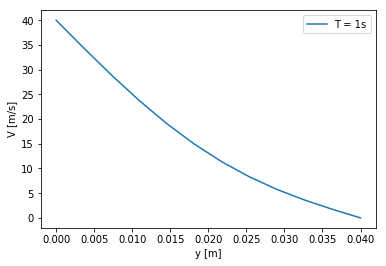

In [10]:
import matplotlib.pyplot as plt

# Definerer variable og randbetingelse
U0 = 40          # m/s
U1 = 0           # m/s
a = 2*10**(-4)   # m^2/s
L = 0.04         # m
dt = 1/80        # s
F = 0.2          # dimentionless
T = 1            # s

# Setter initialbetingelsen
I = lambda x : 0

# Importerer FTCS
from FTCS import FTCS

# Løser diffusjonslikningen for T = 1s
V, y = FTCS(I, U0, U1, a, L, dt, F, T)

# Plotter
plt.figure()
plt.xlabel('y [m]')
plt.ylabel('V [m/s]')
plt.plot(y,V,label='T = {}s'.format(T))
plt.legend()
plt.show()

I oppgaven blir vi bedt om å plotte for fem jevne tidssteg. Slik FTCS funksjonen fungerer nå, vil den kun gi ut løsningen for den siste oppgitte tiden. Dette innebærer at man er nødt til å kjøre metoden fem ganger, skal man plotte for fem ulike tider. Dette gjøres enkelt med en for-løkke

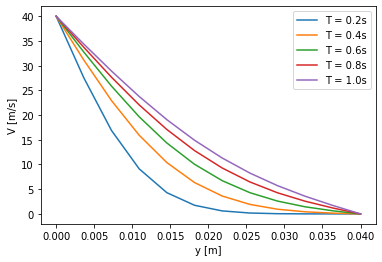

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definerer variable og randbetingelse
U0 = 40                    # m/s
U1 = 0                     # m/s
a = 2*10**(-4)             # m^2/s
L = 0.04                   # m
dt = 1/80                  # s
F = 0.2                    # dimentionless
T = np.linspace(0.2,1,5)   # s

# Setter initialbetingelsen
I = lambda x : 0

# Importerer FTCS
from FTCS import FTCS

# Løser diffusjonslikningen for [0.2, 1.0] med fem tidssteg
plt.figure()
plt.xlabel('y [m]')
plt.ylabel('V [m/s]')
for i in range(len(T)):
    V, y = FTCS(I, U0, U1, a, L, dt, F, T[i])
    plt.plot(y,V,label='T = {:.1f}s'.format(T[i]))

plt.legend()
plt.show()